In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if(pd.notna(skills)) else skills)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\ether\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Thu Jun 19 17:27:53 2025).


In [39]:
df_IN = df[df['job_country'] == 'India'].copy()

job_titles = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Senior Data Scientist','Senior Data Analyst']

df_IN_5 = df_IN[df_IN['job_title_short'].isin(job_titles)]

df_IN_5_order = df_IN_5.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

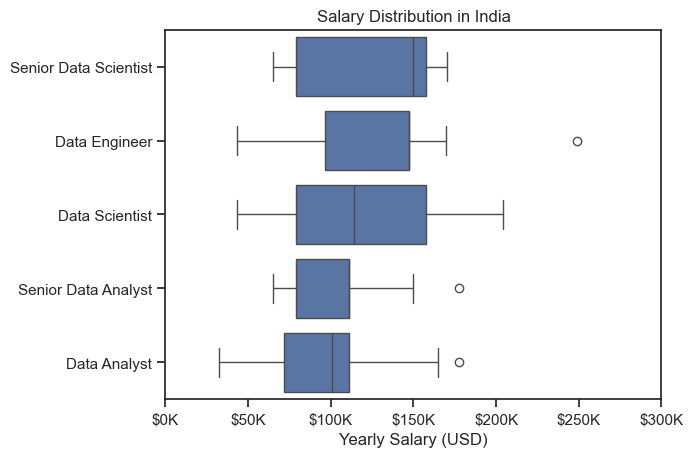

In [56]:
sns.boxplot(df_IN_5,x='salary_year_avg',y='job_title_short', order=df_IN_5_order)
sns.set_theme(style='ticks')

ax = plt.gca().xaxis
ax2 = plt.gca().yaxis
ax2.set_label_text('')
ax.set_label_text('Yearly Salary (USD)')
ax.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.xlim(0,300000)
plt.title('Salary Distribution in India')
plt.show()

In [86]:
df_IN = df_IN[df_IN['job_title_short'] == 'Data Analyst']
df_IN = df_IN.dropna(subset=['salary_year_avg'])
df_IN_exploded = df_IN.explode('job_skills')  

df_IN_top_payed = df_IN_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)

df_IN_popular = df_IN_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)

In [87]:
df_IN_popular

,count,median
job_skills,,
spark,11,111175.0
power bi,17,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


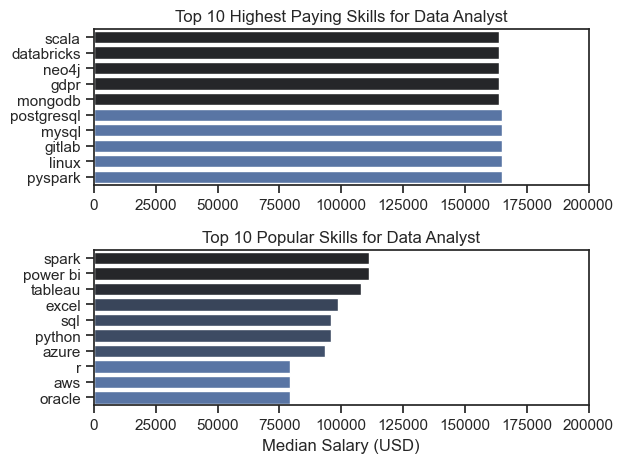

In [96]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')


sns.barplot(data=df_IN_top_payed, x='median', y=df_IN_top_payed.index, ax=ax[0], hue='median', palette='dark:b')
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paying Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().remove()
ax[0].set_xlim(0,200000)


sns.barplot(df_IN_popular, x='median', y=df_IN_popular.index, ax=ax[1], hue='median', palette='dark:b_r')

ax[1].set_title('Top 10 Popular Skills for Data Analyst')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].legend().remove()
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')

fig.tight_layout()
plt.show()
